,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1


Model Accuracy: 0.93


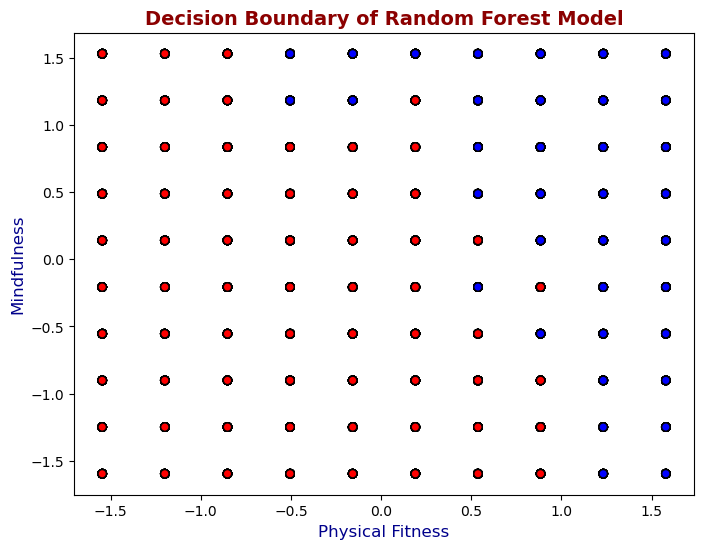

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


df = pd.read_csv(r"D:\Desktop\innovize_final_ml.csv")

# Display basic information
display(df.head())

df.dropna(inplace=True)  # Remove missing values if any

# Encoding categorical variables if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecting features and target
X = df[['phy_fitness', 'mindfulness']]
y = df['is_healthy']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# # Plot decision boundary
# plt.figure(figsize=(8, 6))
# plot_decision_regions(X_train, y_train.values, clf=rf_model, legend=2)
# plt.xlabel('Physical Fitness')
# plt.ylabel('Mindfulness')
# plt.title('Decision Boundary of Random Forest Model')
# plt.show()

import matplotlib.colors as mcolors
from mlxtend.plotting import plot_decision_regions

# Define a custom colormap for the decision boundary
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#FF9999', '#99CCFF'])

# Plot decision boundary with fixed colormap usage
plt.figure(figsize=(8, 6))
# plot_decision_regions(X_train, y_train.values, clf=rf_model, legend=2, cmap=custom_cmap)

# Customize scatter plot points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mcolors.ListedColormap(['#FF0000', '#0000FF']), edgecolor='black')

# Improve visualization with titles and labels
plt.xlabel('Physical Fitness', fontsize=12, color='darkblue')
plt.ylabel('Mindfulness', fontsize=12, color='darkblue')
plt.title('Decision Boundary of Random Forest Model', fontsize=14, fontweight='bold', color='darkred')

plt.show()

